# PyMuPDF: Inserting an Annotation on a PDF Page

This notebook creates a new, empty PDF and a new page in ISO A4 format.
We define a "Circle" annotation and display the result.
> **_Note:_** Apart from importing PyMuPDF itself (fitz), we need some technical preparations which will allow us to display graphical content inline with this document.

In [45]:
# Make sure we have required packages installed by uncommenting any of the following
# !python -m pip install pymupdf
# !python -m pip install matplotlib

import fitz  # import PyMuPDF

def show_image(item, title):
    """Display a pixmap.

    Just to display Pixmap image of "item" - ignore the man behind the curtain.

    Args:
        item: any PyMuPDF object having a "get_pixmap" method.
        title: a string to be used as image title

    Generates an RGB Pixmap from item using a constant DPI and using matplotlib
    to show it inline of the notebook.
    """
    DPI = 150  # use this resolution
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt
    pix = item.get_pixmap(dpi=DPI)
    img = np.ndarray([pix.h, pix.w, 3], dtype=np.uint8, buffer=pix.samples_mv)
    plt.figure(dpi=DPI)  # set the figure's DPI
    plt.title(title)  # set title of image
    _ = plt.imshow(img, extent=(0, pix.w * 72 / DPI, pix.h * 72 / DPI, 0))

Create a new PDF with a new page:

In [46]:
doc = fitz.open()
page = doc.new_page()

Define some rectangle within which we want to show the annotation: size: 200 x 100, top-left: (100, 100), bottom-right (300, 200).

In [47]:
rect = fitz.Rect(100, 100, 300, 200)

We now make a 'Circle' (ellipse) annotation.

In [48]:
annot = page.add_circle_annot(rect)

The result is an **_actual circle only_** if the rectangle width equals the height, `rect.width == rect.height`, otherwise an ellipse. In our case, the result will be an **_ellipse:_** width is 200 and height is 100. Feel free to change the above rectangle definition!

Here are some basic annotation information about the just created annotation

In [49]:
print(annot)  # Python-level information
for k, v in annot.info.items():  # spell out the information dictionary
    print(f"{k} = '{v}'")

'Circle' annotation on page 0 of <new PDF, doc# 5>
content = ''
name = ''
title = ''
creationDate = ''
modDate = ''
subject = ''
id = 'fitz-A0'


The standard line width is 1 and the colors for **'Circle'** annotations are **red** for the border ('stroke') and *None* (empty) for the interior ('fill'), see here:

default colors: {'stroke': (1.0, 0.0, 0.0), 'fill': None}
default border: {'width': 1.0, 'dashes': (), 'style': None, 'clouds': -1}


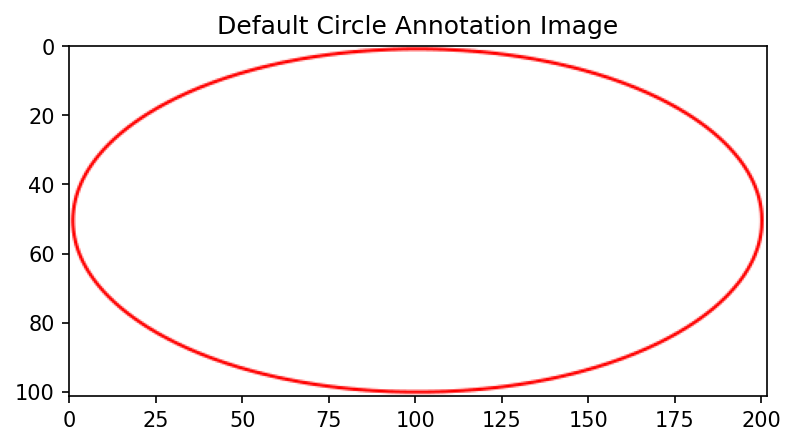

In [50]:
print("default colors:", annot.colors)  # show the default colors,
print("default border:", annot.border)  # ... the border
show_image(annot, "Default Circle Annotation Image")  # ... and the annot image

Let us be a little creative and give our annotation a **blue** border and a **yellow** interior. The border color is set by parameter "stroke", and the interior color is set by "fill".

> There is a dictionary `pdfcolor` in PyMuPDF, that contains about 500 predefined named RGB colors in PDF-compatible format. This format stores each color as a 3-tuple of floats with values between 0 and 1. For example, the "yellow" key refers to tuple `(1, 1, 0)`. Consult the documentation [here](https://pymupdf.readthedocs.io/en/latest/colors.html) for more details on the "color database".

In [51]:
annot.set_colors(stroke=fitz.pdfcolor["blue"], fill=fitz.pdfcolor["yellow"])

How about adding some dashing to the border? Let's use strokes of 2 points length followed by 2 point gaps. PyMuPDF 1.22.5 supports a cloudy border appearance for selected annotation types - let's try that out and use large cloud semi-circles. We also use a larger line thickness: 1.5.

In [52]:
annot.set_border(dashes=[2, 2], width=1.5, clouds=2)

Changes to an annotation's appearance require invoking its `update()` method to activate them.

This is needed only once - after all desired changes have been made.

In [53]:
annot.update()

Here is how the annotation looks like now:

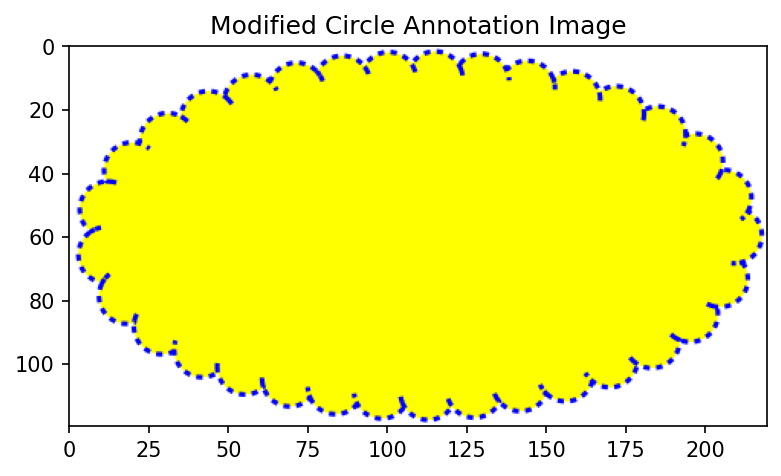

In [54]:
show_image(annot, "Modified Circle Annotation Image")

And here is the image of the **full page**, showing the annotation's location on it:

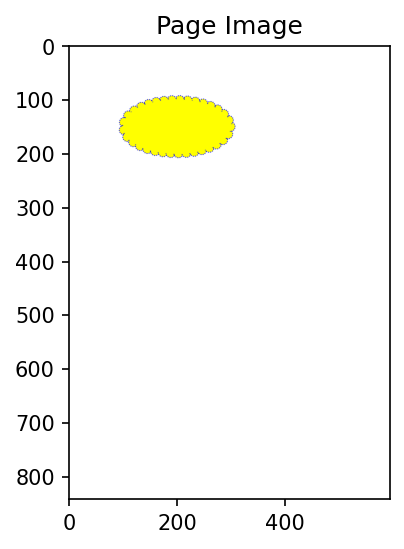

In [55]:
show_image(page, "Page Image")